# M3T01 Ejercicios de Training i Test Sets
-----------------------------

Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

Guardamos los datos del csv en el dataframe: **flights_data**

In [2]:
data_path_file='DelayedFlights.csv'
flights_data=pd.read_csv(data_path_file)
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [3]:
flights_data.describe().round(1)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1929648.0,1936758.0,1936758.0,...,1936758.0,1929648.0,1936303.0,1936758.0,1936758.0,1247488.0,1247488.0,1247488.0,1247488.0,1247488.0
mean,3341651.2,2008.0,6.1,15.8,4.0,1518.5,1467.5,1610.1,1634.2,2184.3,...,765.7,6.8,18.2,0.0,0.0,19.2,3.7,15.0,0.1,25.3
std,2066065.0,0.0,3.5,8.8,2.0,450.5,424.8,548.2,464.6,1944.7,...,574.5,5.3,14.3,0.0,0.1,43.5,21.5,33.8,2.0,42.1
min,0.0,2008.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1517452.5,2008.0,3.0,8.0,2.0,1203.0,1135.0,1316.0,1325.0,610.0,...,338.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3242558.0,2008.0,6.0,16.0,4.0,1545.0,1510.0,1715.0,1705.0,1543.0,...,606.0,6.0,14.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0
75%,4972466.8,2008.0,9.0,23.0,6.0,1900.0,1815.0,2030.0,2014.0,3422.0,...,998.0,8.0,21.0,0.0,0.0,21.0,0.0,15.0,0.0,33.0
max,7009727.0,2008.0,12.0,31.0,7.0,2400.0,2359.0,2400.0,2400.0,9742.0,...,4962.0,240.0,422.0,1.0,1.0,2436.0,1352.0,1357.0,392.0,1316.0


In [4]:
flights_data.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_data.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [6]:
flights_data.shape

(1936758, 30)

In [7]:
flights_data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Centraremos el analisis en las caracteristicas de interés: **features** y lo guardaremos en el dataframe **X**

In [8]:
features=[ 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
          'CRSElapsedTime', 'AirTime', 'ArrDelay','DepDelay', 'Distance', 'Cancelled', 'Diverted']

In [9]:
X= flights_data[features]

In [10]:
X.shape

(1936758, 13)

In [11]:
X.describe().round(1)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted
count,1936758.0,1936758.0,1936758.0,1929648.0,1936758.0,1928371.0,1936560.0,1928371.0,1928371.0,1936758.0,1936758.0,1936758.0,1936758.0
mean,4.0,1518.5,1467.5,1610.1,1634.2,133.3,134.3,108.3,42.2,43.2,765.7,0.0,0.0
std,2.0,450.5,424.8,548.2,464.6,72.1,71.3,68.6,56.8,53.4,574.5,0.0,0.1
min,1.0,1.0,0.0,1.0,0.0,14.0,-25.0,0.0,-109.0,6.0,11.0,0.0,0.0
25%,2.0,1203.0,1135.0,1316.0,1325.0,80.0,82.0,58.0,9.0,12.0,338.0,0.0,0.0
50%,4.0,1545.0,1510.0,1715.0,1705.0,116.0,116.0,90.0,24.0,24.0,606.0,0.0,0.0
75%,6.0,1900.0,1815.0,2030.0,2014.0,165.0,165.0,137.0,56.0,53.0,998.0,0.0,0.0
max,7.0,2400.0,2359.0,2400.0,2400.0,1114.0,660.0,1091.0,2461.0,2467.0,4962.0,1.0,1.0


In [12]:
X.isnull().sum()

DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Distance                0
Cancelled               0
Diverted                0
dtype: int64

Supongamos que queremos entrenar un modelo que sea capaz de estimar la caracteristica **'ArrDelay'**. Para ello **'Arrdelay'** no ha de tener faltantes. tratandose de un numero relativamente bajo descartaremos las filas con **'ArrDelay'** faltantes para toda la matriz de caracteristicas **X**

In [13]:
print('Porcentaje de datos descartados:', round(X['ArrDelay'].isnull().sum()/X.shape[0]*100,2),'%')

Porcentaje de datos descartados: 0.43 %


In [14]:
nodelay = ~(X['ArrDelay'].isnull())
nodelay.shape

(1936758,)

In [15]:
X= X[nodelay]

In [16]:
X.shape

(1928371, 13)

Guardamos en la variable **y** la caracteristica **'ArrDelay'** y la eliminaremos de la matriz de caracteristicas **X**

In [17]:
y= X.ArrDelay

In [18]:
y.shape

(1928371,)

In [19]:
X.drop( columns='ArrDelay', inplace= True )

In [20]:
X.shape

(1928371, 12)

Por tanto las caracteristicas de la matrix **X** seran las contenidas en la lista **feat_X**

In [21]:
feat_X=[ 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
          'CRSElapsedTime', 'AirTime','DepDelay', 'Distance', 'Cancelled', 'Diverted']

---------------------------------------------
## Ejercicio 1: 

Divide el csv en train y test split. Estudia los 2 conjuntos a nivel descriptivo.

-----------------------------------------------

In [22]:
# Dividimos los datos en training y test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=33)

In [23]:
print(X_train.shape, y_train.shape)

(1542696, 12) (1542696,)


In [24]:
print(X_test.shape, y_test.shape)

(385675, 12) (385675,)


Definimos las caracteristicas continuas **cont_features**

In [25]:
cont_features=[ 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
          'CRSElapsedTime', 'AirTime','DepDelay', 'Distance']

Observemos los valores de dichas caracteristicas para los 2 grupos resultantes

In [26]:
X_train[cont_features].describe().round(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance
count,1542696.0,1542696.0,1542696.0,1542696.0,1542696.0,1542696.0,1542696.0,1542696.0,1542696.0
mean,1518.9,1467.9,1610.3,1634.5,133.3,134.2,108.3,43.1,765.0
std,450.3,424.7,548.1,464.4,72.1,71.2,68.6,53.2,573.8
min,1.0,0.0,1.0,0.0,14.0,8.0,0.0,6.0,11.0
25%,1203.0,1135.0,1316.0,1325.0,80.0,82.0,58.0,12.0,338.0
50%,1545.0,1510.0,1715.0,1706.0,116.0,116.0,90.0,24.0,606.0
75%,1900.0,1815.0,2030.0,2015.0,165.0,165.0,137.0,53.0,997.0
max,2400.0,2359.0,2400.0,2359.0,1114.0,660.0,1091.0,2467.0,4962.0


In [27]:
X_test[cont_features].describe().round(1)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance
count,385675.0,385675.0,385675.0,385675.0,385675.0,385675.0,385675.0,385675.0,385675.0
mean,1517.6,1467.2,1610.0,1632.8,133.3,134.2,108.3,43.1,764.9
std,450.9,425.0,547.7,465.5,72.1,71.3,68.7,53.4,574.1
min,1.0,0.0,1.0,0.0,15.0,-21.0,1.0,6.0,24.0
25%,1202.0,1135.0,1315.0,1325.0,80.0,81.0,58.0,12.0,338.0
50%,1545.0,1510.0,1715.0,1705.0,116.0,116.0,90.0,24.0,606.0
75%,1900.0,1815.0,2031.0,2014.0,165.0,165.0,137.0,53.0,997.0
max,2400.0,2359.0,2400.0,2359.0,790.0,660.0,651.0,1552.0,4962.0


Observamos como tanto el valor medio, la desviacion estandar y la mediana son practicamente identicas en ambos conjuntos.
Solo se observa alguna diferencia en algun valor minimo de alguna caracteristica; como es el caso de los valores minimos de 'CRSElapsedTime' y 'Distance' y los valores maximos de 'AirTime' y 'DeepDelay'

Evaluemos ahora las variables con valores discretos: **disc_features**

En realidad corresponden a variables categoricas a las que se ha asignado un valor numerico.

In [28]:
disc_features= ['DayOfWeek', 'Cancelled', 'Diverted']

In [29]:
X_train[disc_features].describe().round(1)

,DayOfWeek,Cancelled,Diverted
count,1542696.0,1542696.0,1542696.0
mean,4.0,0.0,0.0
std,2.0,0.0,0.0
min,1.0,0.0,0.0
25%,2.0,0.0,0.0
50%,4.0,0.0,0.0
75%,6.0,0.0,0.0
max,7.0,0.0,0.0


In [30]:
X_test[disc_features].describe().round(1)

,DayOfWeek,Cancelled,Diverted
count,385675.0,385675.0,385675.0
mean,4.0,0.0,0.0
std,2.0,0.0,0.0
min,1.0,0.0,0.0
25%,2.0,0.0,0.0
50%,4.0,0.0,0.0
75%,6.0,0.0,0.0
max,7.0,0.0,0.0


Observamos como las columnas Cancelled y Diverted ahora solo tienen valores de 0. Los valores de 1 corresponden con los filas faltantes de 'ArrDelay'. Por ello, si en futuros modelos queremos incluir la informacion de dichas columnas se deberia hacer una imputacion a 'ArrDelay'

Por lo que respecta a 'DayOfWeek' observamos que se mantienen mean, std y median para ambos grupos de Train y Test

Evaluemos ahora la variable de interes y

In [31]:
y_train.describe().round(1)

count    1542696.0
mean          42.2
std           56.8
min         -109.0
25%            9.0
50%           24.0
75%           56.0
max         2461.0
Name: ArrDelay, dtype: float64

In [32]:
y_test.describe().round(1)

count    385675.0
mean         42.2
std          56.9
min         -70.0
25%           9.0
50%          24.0
75%          56.0
max        1583.0
Name: ArrDelay, dtype: float64

Nuevamente observamos mean, std y median practicamente iguales y se observan diferencias en los valores extremos.

## Ejercicio 2

Aplicaremos el proceso de transformación: Standardization. 

Para cada caracteristica aplicamos **z=(x-u)/s** calculando u:mean; s:std en el grupo de TRAIN

----------------------

Renombramos la funcion a usar por conveniencia

In [33]:
scaler = preprocessing.StandardScaler()

En la matriz de datos X no hemos incluido 'UniqueCarrier' variable categorica con 20 valores diferentes. Al tener tanto valores hacer un One-hot encoding de una variable categorica con mas de 15 valores diferentes es desaconsejable.

Haremos la Standarizacion solo al conjunto de datos TRAIN. Lo haremos asi para evitar Data leakage en los datos de set. 

Posteriormente transformaremos los datos de SET de acuerdo a la tranformacion realizada al conjunto TRAIN.

In [34]:
# Fit to TRAIN data. Then transform it.

M_train_std = scaler.fit_transform(X_train)

In [35]:
type(M_train_std)

numpy.ndarray

In [36]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [37]:
scaler.mean_

array([   3.98578333, 1518.90687537, 1467.85221068, 1610.29610695,
       1634.53629166,  133.31390955,  134.20071161,  108.2819888 ,
         43.08648431,  764.97250787,    0.        ,    0.        ])

In [38]:
scaler.var_

array([3.98474502e+00, 2.02797687e+05, 1.80346533e+05, 3.00391936e+05,
       2.15681355e+05, 5.19208827e+03, 5.07289827e+03, 4.71118622e+03,
       2.83365837e+03, 3.29271247e+05, 0.00000000e+00, 0.00000000e+00])

In [39]:
M_train_std

array([[ 0.00712193,  1.1349286 ,  1.02937683, ..., -0.24567305,
         0.        ,  0.        ],
       [ 1.50999045,  1.31923762,  1.48855445, ..., -0.86781762,
         0.        ,  0.        ],
       [-0.49383424,  0.07348628,  0.165181  , ..., -0.15330985,
         0.        ,  0.        ],
       ...,
       [-1.49574659,  0.9683843 ,  1.06469818, ..., -0.58549992,
         0.        ,  0.        ],
       [ 0.00712193, -0.45501429, -0.53418184, ...,  0.21440024,
         0.        ,  0.        ],
       [ 1.50999045,  1.51909078,  1.55919716, ..., -0.36766218,
         0.        ,  0.        ]])

In [40]:
M_train_std.shape

(1542696, 12)

In [41]:
X_train_std= pd.DataFrame(M_train_std, columns= feat_X )

Ahora aplicamos la transformacion calculada a partir de la datos de X_train en los datos de TEST X_test

In [42]:
# Transform TEST data 

M_test_std = scaler.transform(X_test)

In [43]:
X_test_std= pd.DataFrame(M_test_std, columns= feat_X )

## Ejercicio 3

Resume las nuevas columnas de manera estadistica y grafica.

--------------------------------------

In [44]:
X_train_std.describe().round(3)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Cancelled,Diverted
count,1542696.000,1542696.000,1542696.000,1542696.000,1542696.000,1542696.000,1542696.000,1542696.000,1542696.000,1542696.000,1542696.0,1542696.0
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.0,0.0
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.0,0.0
min,-1.496,-3.371,-3.456,-2.936,-3.520,-1.656,-1.772,-1.578,-0.697,-1.314,0.0,0.0
25%,-0.995,-0.701,-0.784,-0.537,-0.667,-0.740,-0.733,-0.733,-0.584,-0.744,0.0,0.0
50%,0.007,0.058,0.099,0.191,0.154,-0.240,-0.256,-0.266,-0.359,-0.277,0.0,0.0
75%,1.009,0.846,0.817,0.766,0.819,0.440,0.432,0.418,0.186,0.404,0.0,0.0
max,1.510,1.957,2.098,1.441,1.560,13.610,7.382,14.317,45.535,7.314,0.0,0.0


In [45]:
X_test_std.describe().round(3)

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,Cancelled,Diverted
count,385675.000,385675.000,385675.000,385675.000,385675.000,385675.000,385675.000,385675.000,385675.000,385675.000,385675.0,385675.0
mean,-0.002,-0.003,-0.002,-0.000,-0.004,-0.001,-0.000,-0.000,0.000,-0.000,0.0,0.0
std,1.000,1.001,1.001,0.999,1.002,1.000,1.001,1.000,1.003,1.001,0.0,0.0
min,-1.496,-3.371,-3.456,-2.936,-3.520,-1.642,-2.179,-1.563,-0.697,-1.291,0.0,0.0
25%,-0.995,-0.704,-0.784,-0.539,-0.667,-0.740,-0.747,-0.733,-0.584,-0.744,0.0,0.0
50%,0.007,0.058,0.099,0.191,0.152,-0.240,-0.256,-0.266,-0.359,-0.277,0.0,0.0
75%,1.009,0.846,0.817,0.768,0.817,0.440,0.432,0.418,0.186,0.404,0.0,0.0
max,1.510,1.957,2.098,1.441,1.560,9.114,7.382,7.907,28.346,7.314,0.0,0.0


Observamos como en los datos de TRAIN mean=0 y std=1, que era el objetivo de la standarizacion. En los datos de test son practicamente 0 y 1 respectivamente. Ademas los valores de mediana tambien son practicamente iguales en ambos grupos como pasaba antes de la standarizacion. 

Tambien se aprecian las diferencias observadas en los valores minimos de 'CRSElapsedTime' y 'Distance' y los valores maximos de 'AirTime' y 'DeepDelay'

Tambien existe la funcion sklearn.preprocessing.RobustScaler() que teoricamente es mas robusta frente la existencia de outliers

RobustScaler resta la mediana y divide por el valor IQR.  Los outliers pueden sesgar el valor medio y la varianza, sin embargo la mediana y el IQR son mas robustos a los outliers.

In [46]:
print(cont_features)

['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Distance']


En los siguientes graficos se puede observar como la transformacion mantiene la forma del histograma. También observamos como la mediana, el rango IQR y los outliers se mantienen pero escalados a otros valores.

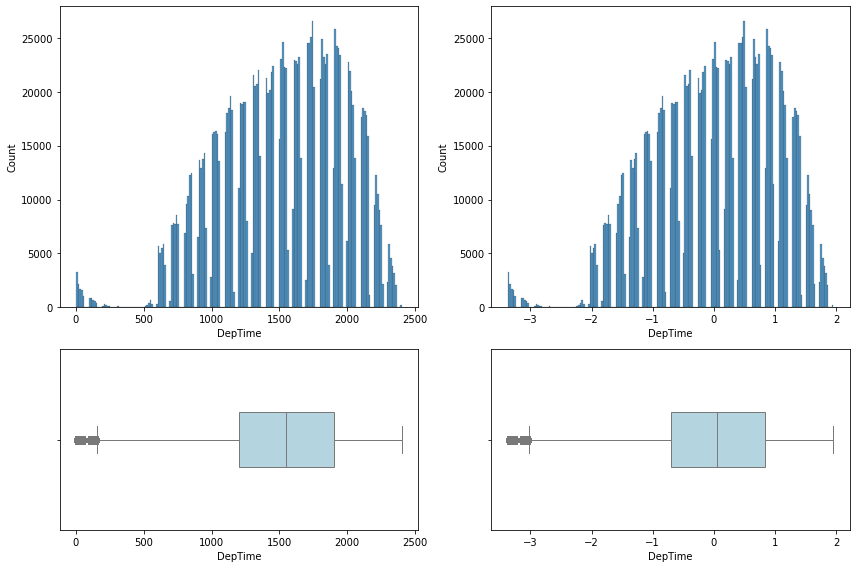

In [47]:
#Axes-level functions make self-contained plots

f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='DepTime')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='DepTime')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='DepTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='DepTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

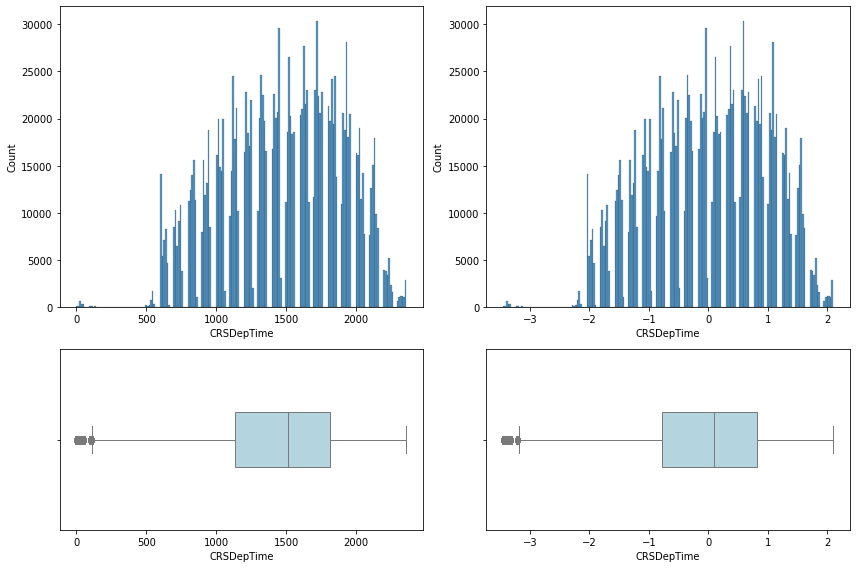

In [48]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='CRSDepTime')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='CRSDepTime')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='CRSDepTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='CRSDepTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

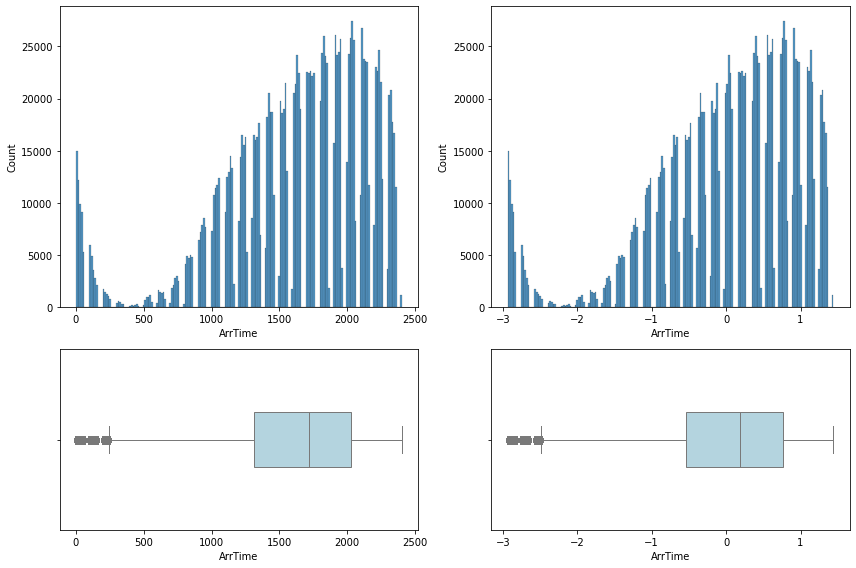

In [49]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='ArrTime')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='ArrTime')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='ArrTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='ArrTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

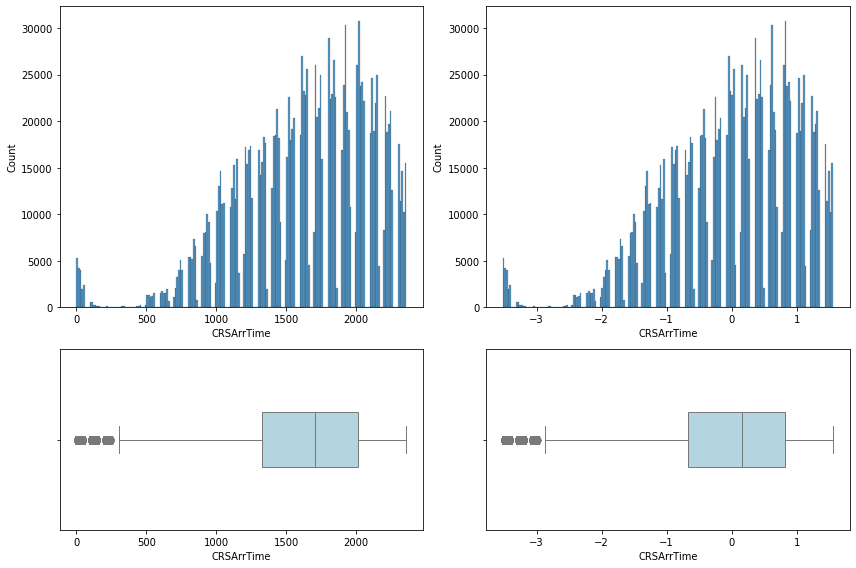

In [50]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='CRSArrTime')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='CRSArrTime')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='CRSArrTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='CRSArrTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

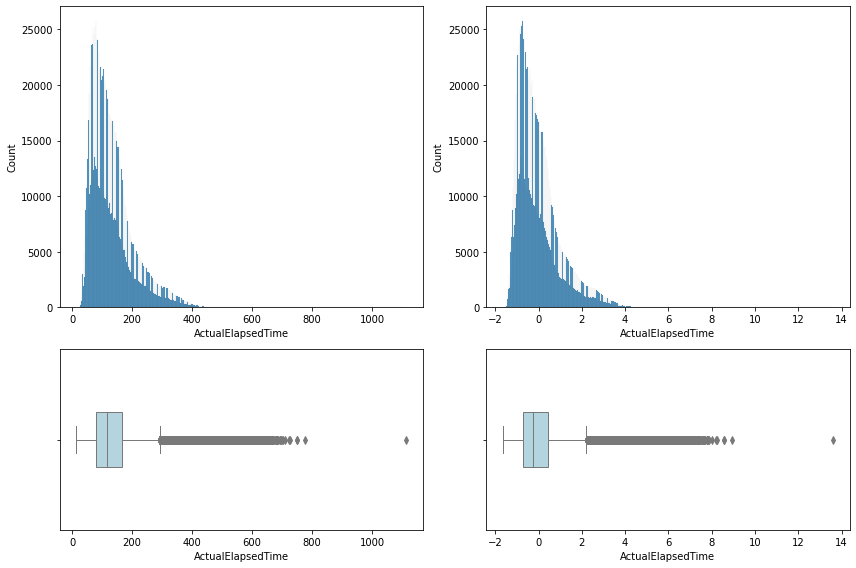

In [51]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='ActualElapsedTime')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='ActualElapsedTime')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='ActualElapsedTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='ActualElapsedTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

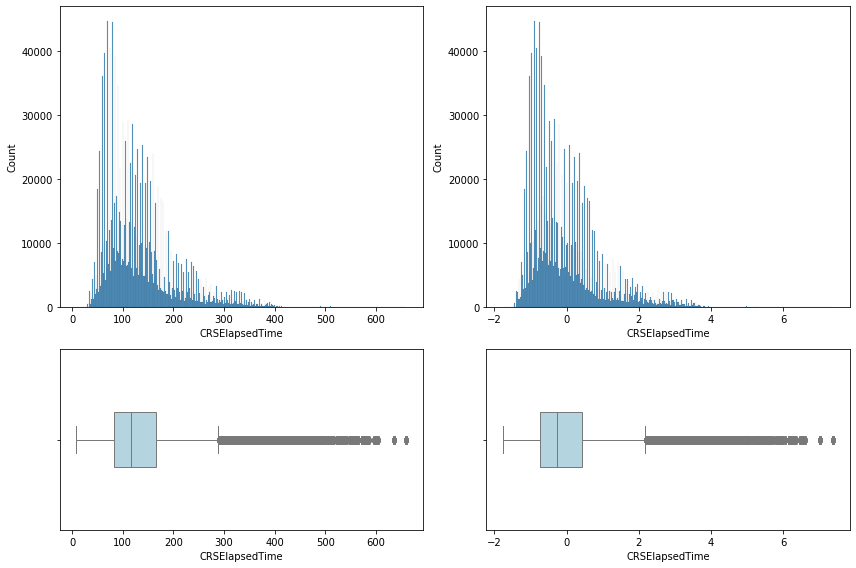

In [52]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='CRSElapsedTime')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='CRSElapsedTime')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='CRSElapsedTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='CRSElapsedTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

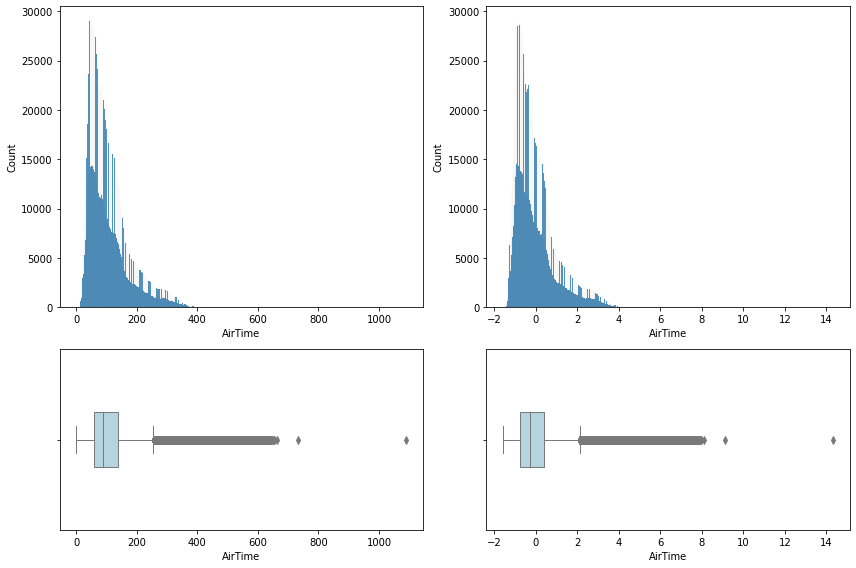

In [53]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='AirTime')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='AirTime')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='AirTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='AirTime', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

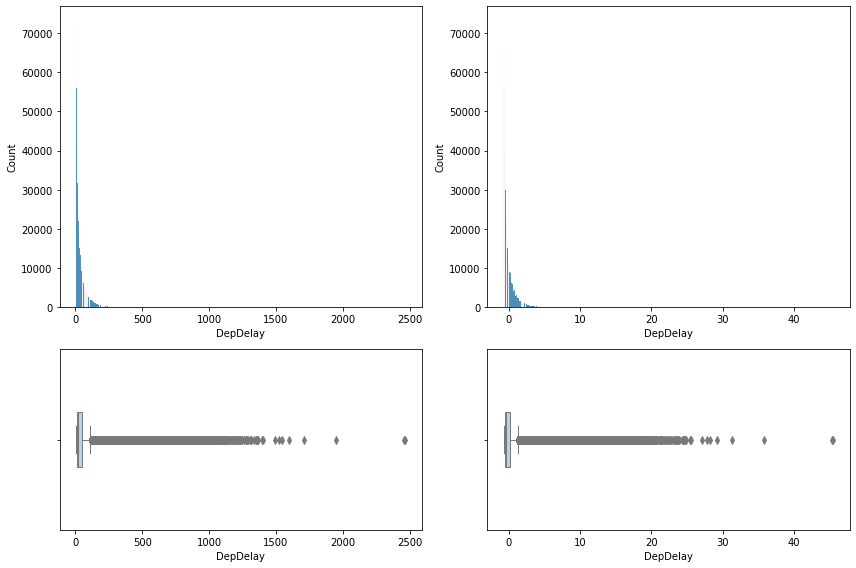

In [54]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='DepDelay')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='DepDelay')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='DepDelay', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='DepDelay', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

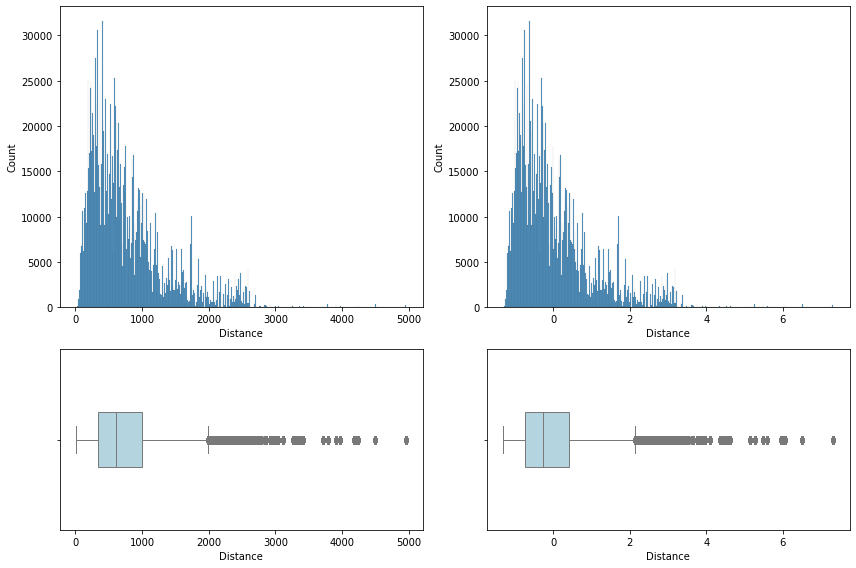

In [55]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='Distance')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='Distance')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='Distance', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='Distance', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()

Para la variable categorica integrada en la base de datos con enteros 'DayOfWeek', tambien observamos como se mantiene la forma del histograma y el IQR 

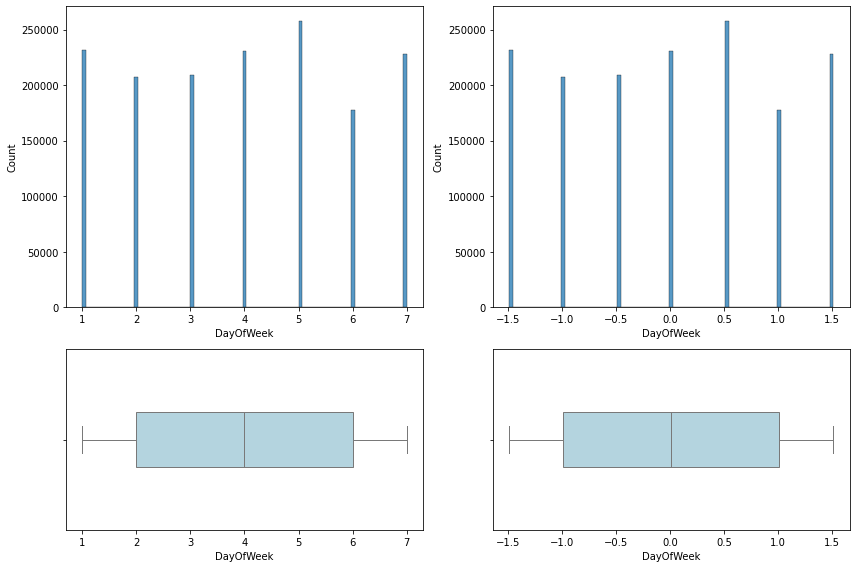

In [56]:
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4], height_ratios=[5, 3]))
plt.subplot(2,2,1)
sns.histplot(data=X_train, x='DayOfWeek')
plt.subplot(2,2,2)
sns.histplot(data=X_train_std, x='DayOfWeek')
plt.subplot(2,2,3)
sns.boxplot(data=X_train, x='DayOfWeek', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
plt.subplot(2,2,4)
sns.boxplot(data=X_train_std, x='DayOfWeek', color='lightblue', fliersize=5, linewidth=1 , width=0.3)
f.tight_layout()